<a href="https://colab.research.google.com/github/Pankaj132/Rainfall-prediction-project/blob/main/LOG_9_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM: The task here is to predict whether it's raining or not**

**Importing Necessary Libraries**

In [3]:
# import all the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [4]:
# import all the necessary libraries
df = pd.read_csv('/content/new data for log 9 project.csv')
df.head()

,time,temperature_2m (?C),relativehumidity_2m (%),dewpoint_2m (?C),apparent_temperature (?C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m?),direct_radiation (W/m?),windspeed_100m (km/h),winddirection_100m (?),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (?C)
0,2020-01-01T00:00,18.8,94,17.8,21.6,1016.1,921.4,0.0,0.0,0,94,4,78,0,0,22.9,114,0.14,20.9
1,2020-01-01T01:00,18.8,94,17.7,21.0,1015.7,920.8,0.0,0.0,0,99,8,74,0,0,21.7,114,0.14,20.8
2,2020-01-01T02:00,18.6,95,17.7,20.7,1015.2,920.3,0.0,0.0,0,99,9,70,0,0,20.3,113,0.12,20.7
3,2020-01-01T03:00,18.4,95,17.6,20.3,1014.9,920.0,0.0,0.0,0,96,17,92,0,0,21.1,113,0.11,20.6
4,2020-01-01T04:00,18.2,95,17.4,20.1,1015.2,920.2,0.0,0.0,0,98,13,89,0,0,20.3,110,0.10,20.5


In [5]:
# dataset columns
df.columns

Index(['time', 'temperature_2m (?C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (?C)', 'apparent_temperature (?C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'windspeed_100m (km/h)',
       'winddirection_100m (?)', 'vapor_pressure_deficit (kPa)',
       'soil_temperature_0_to_7cm (?C)'],
      dtype='object')

In [6]:
# to checking basic info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time                            26304 non-null  object 
 1   temperature_2m (?C)             26304 non-null  float64
 2   relativehumidity_2m (%)         26304 non-null  int64  
 3   dewpoint_2m (?C)                26304 non-null  float64
 4   apparent_temperature (?C)       26304 non-null  float64
 5   pressure_msl (hPa)              26304 non-null  float64
 6   surface_pressure (hPa)          26304 non-null  float64
 7   precipitation (mm)              26304 non-null  float64
 8   rain (mm)                       26304 non-null  float64
 9   snowfall (cm)                   26304 non-null  int64  
 10  cloudcover_low (%)              26304 non-null  int64  
 11  cloudcover_mid (%)              26304 non-null  int64  
 12  cloudcover_high (%)             

### After applying info we get to know that there is no null values present in our dataset.

In [7]:
# renaming our columns name for more understanding
df.rename(columns = {'temperature_2m (?C)':'temperature', 'relativehumidity_2m (%)':'relative humidity',
                              'dewpoint_2m (?C)':'dewpoint' ,'apparent_temperature (?C)':'apparent_temperature', 'pressure_msl (hPa)' : 'pressure',
                       'surface_pressure (hPa)'  : 'surface pressure' ,'precipitation (mm)':'precipitation', 'rain (mm)' : 'rain', 'snowfall (cm)' : 'snowfall',
                        'cloudcover_low (%)' : 'cloudcover low', 'cloudcover_mid (%)' :'cloudcover mid','cloudcover_high (%)':'cloudcover_high',
                        'shortwave_radiation (W/m?)' : 'shortwave radiation',
                        'direct_radiation (W/m?)' : 'direct radiation',
                        'windspeed_100m (km/h)' : 'windspeed', 'winddirection_100m (?)':'winddirection_100m',
                        'vapor_pressure_deficit (kPa)' : 'vapor pressure deficit',
                        'soil_temperature_0_to_7cm (?C)' : 'soil temperature',
                        }
             , inplace = True)

In [8]:
df.head()

,time,temperature,relative humidity,dewpoint,apparent_temperature,pressure,surface pressure,precipitation,rain,snowfall,cloudcover low,cloudcover mid,cloudcover_high,shortwave radiation,direct radiation,windspeed,winddirection_100m,vapor pressure deficit,soil temperature
0,2020-01-01T00:00,18.8,94,17.8,21.6,1016.1,921.4,0.0,0.0,0,94,4,78,0,0,22.9,114,0.14,20.9
1,2020-01-01T01:00,18.8,94,17.7,21.0,1015.7,920.8,0.0,0.0,0,99,8,74,0,0,21.7,114,0.14,20.8
2,2020-01-01T02:00,18.6,95,17.7,20.7,1015.2,920.3,0.0,0.0,0,99,9,70,0,0,20.3,113,0.12,20.7
3,2020-01-01T03:00,18.4,95,17.6,20.3,1014.9,920.0,0.0,0.0,0,96,17,92,0,0,21.1,113,0.11,20.6
4,2020-01-01T04:00,18.2,95,17.4,20.1,1015.2,920.2,0.0,0.0,0,98,13,89,0,0,20.3,110,0.10,20.5


In [9]:
# in a city like bengaluru it's like unexplainable pheonemena if snowfall happens , so i can drop snowfal as it does not contain not useful column in the data set 
df.drop(['snowfall'],axis = 1, inplace = True)

In [10]:
df.head()

,time,temperature,relative humidity,dewpoint,apparent_temperature,pressure,surface pressure,precipitation,rain,cloudcover low,cloudcover mid,cloudcover_high,shortwave radiation,direct radiation,windspeed,winddirection_100m,vapor pressure deficit,soil temperature
0,2020-01-01T00:00,18.8,94,17.8,21.6,1016.1,921.4,0.0,0.0,94,4,78,0,0,22.9,114,0.14,20.9
1,2020-01-01T01:00,18.8,94,17.7,21.0,1015.7,920.8,0.0,0.0,99,8,74,0,0,21.7,114,0.14,20.8
2,2020-01-01T02:00,18.6,95,17.7,20.7,1015.2,920.3,0.0,0.0,99,9,70,0,0,20.3,113,0.12,20.7
3,2020-01-01T03:00,18.4,95,17.6,20.3,1014.9,920.0,0.0,0.0,96,17,92,0,0,21.1,113,0.11,20.6
4,2020-01-01T04:00,18.2,95,17.4,20.1,1015.2,920.2,0.0,0.0,98,13,89,0,0,20.3,110,0.10,20.5


# **Data Preprocessing**

### In data preprocessing field i have chcked that which column is necessary and which is not for feature engineering. And also defining time column as Datetime for better understanding.



In [11]:
from datetime import datetime
import datetime as dt

In [12]:
df['time'] = pd.to_datetime(df['time'])
df['Date'] = df['time'].dt.date
df.set_index('Date',inplace = True)
df.head()

,time,temperature,relative humidity,dewpoint,apparent_temperature,pressure,surface pressure,precipitation,rain,cloudcover low,cloudcover mid,cloudcover_high,shortwave radiation,direct radiation,windspeed,winddirection_100m,vapor pressure deficit,soil temperature
Date,,,,,,,,,,,,,,,,,,
2020-01-01,2020-01-01 00:00:00,18.8,94,17.8,21.6,1016.1,921.4,0.0,0.0,94,4,78,0,0,22.9,114,0.14,20.9
2020-01-01,2020-01-01 01:00:00,18.8,94,17.7,21.0,1015.7,920.8,0.0,0.0,99,8,74,0,0,21.7,114,0.14,20.8
2020-01-01,2020-01-01 02:00:00,18.6,95,17.7,20.7,1015.2,920.3,0.0,0.0,99,9,70,0,0,20.3,113,0.12,20.7
2020-01-01,2020-01-01 03:00:00,18.4,95,17.6,20.3,1014.9,920.0,0.0,0.0,96,17,92,0,0,21.1,113,0.11,20.6
2020-01-01,2020-01-01 04:00:00,18.2,95,17.4,20.1,1015.2,920.2,0.0,0.0,98,13,89,0,0,20.3,110,0.10,20.5


In [13]:
df.drop('time', axis = 1, inplace = True)
df.columns

Index(['temperature', 'relative humidity', 'dewpoint', 'apparent_temperature',
       'pressure', 'surface pressure', 'precipitation', 'rain',
       'cloudcover low', 'cloudcover mid', 'cloudcover_high',
       'shortwave radiation', 'direct radiation', 'windspeed',
       'winddirection_100m', 'vapor pressure deficit', 'soil temperature'],
      dtype='object')

In [14]:
df.head()

,temperature,relative humidity,dewpoint,apparent_temperature,pressure,surface pressure,precipitation,rain,cloudcover low,cloudcover mid,cloudcover_high,shortwave radiation,direct radiation,windspeed,winddirection_100m,vapor pressure deficit,soil temperature
Date,,,,,,,,,,,,,,,,,
2020-01-01,18.8,94,17.8,21.6,1016.1,921.4,0.0,0.0,94,4,78,0,0,22.9,114,0.14,20.9
2020-01-01,18.8,94,17.7,21.0,1015.7,920.8,0.0,0.0,99,8,74,0,0,21.7,114,0.14,20.8
2020-01-01,18.6,95,17.7,20.7,1015.2,920.3,0.0,0.0,99,9,70,0,0,20.3,113,0.12,20.7
2020-01-01,18.4,95,17.6,20.3,1014.9,920.0,0.0,0.0,96,17,92,0,0,21.1,113,0.11,20.6
2020-01-01,18.2,95,17.4,20.1,1015.2,920.2,0.0,0.0,98,13,89,0,0,20.3,110,0.10,20.5


In [15]:
new_df = df.groupby('Date').agg({'temperature':'mean', 'relative humidity':'mean', 'dewpoint':'mean', 'apparent_temperature':'mean',
       'pressure':'mean', 'surface pressure':'mean', 'precipitation':'sum', 'rain':'sum',
       'cloudcover low':'mean', 'cloudcover mid':'mean', 'cloudcover_high':'mean',
       'shortwave radiation':'sum', 'direct radiation':'sum', 'windspeed':'mean',
       'winddirection_100m':'mean', 'vapor pressure deficit':'mean', 'soil temperature':'mean'})

In [16]:
new_df.head()

,temperature,relative humidity,dewpoint,apparent_temperature,pressure,surface pressure,precipitation,rain,cloudcover low,cloudcover mid,cloudcover_high,shortwave radiation,direct radiation,windspeed,winddirection_100m,vapor pressure deficit,soil temperature
Date,,,,,,,,,,,,,,,,,
2020-01-01,21.245833,80.833333,17.545833,23.283333,1015.958333,921.795833,1.0,1.0,57.666667,13.958333,45.958333,4312,2729,19.041667,114.250000,0.547500,23.120833
2020-01-02,21.725000,79.750000,17.775000,24.295833,1016.779167,922.770833,0.8,0.8,53.333333,15.041667,10.666667,4083,2473,16.420833,129.750000,0.590000,23.445833
2020-01-03,22.762500,72.791667,16.970833,25.433333,1015.279167,921.633333,0.0,0.0,40.083333,9.500000,0.875000,5229,3987,12.945833,154.541667,0.884167,24.304167
2020-01-04,23.108333,68.291667,16.204167,25.412500,1013.433333,920.012500,0.0,0.0,22.166667,17.375000,0.833333,4985,3592,11.741667,212.375000,1.024583,24.554167
2020-01-05,23.137500,70.583333,16.800000,25.583333,1013.275000,919.904167,0.0,0.0,23.833333,14.958333,67.958333,4877,3546,13.150000,132.375000,0.953750,24.629167


### I used Aggregate function in here to calculate the best values which is good for my model.

### **The model is not that good while working with Linear Regression. So i had used the technique called Classification to get best picture of my model.**

In [17]:
def rain_or_not(data):
  if data == 0 or data < 0:
    return 0
  else:
    return 1

In [18]:
new_df['Rain'] = new_df['rain'].apply(rain_or_not)

In [19]:
new_df['Rain'].value_counts()

1    607
0    489
Name: Rain, dtype: int64

In [20]:
new_df.drop('rain',axis = 1, inplace = True)

In [21]:
new_df.describe()

,temperature,relative humidity,dewpoint,apparent_temperature,pressure,surface pressure,precipitation,cloudcover low,cloudcover mid,cloudcover_high,shortwave radiation,direct radiation,windspeed,winddirection_100m,vapor pressure deficit,soil temperature,Rain
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,22.717419,72.140891,16.460097,25.107672,1011.272643,918.008854,3.182208,28.499278,25.553110,54.167655,5095.102190,3302.274635,17.759573,182.089454,0.914313,24.839351,0.553832
std,2.168476,14.344992,3.508780,2.569205,2.653305,2.279357,6.192899,23.101711,23.644204,37.151860,1523.060264,1775.816333,6.266585,80.756839,0.570075,2.894350,0.497321
min,16.525000,26.791667,1.350000,17.037500,1003.979167,911.058333,0.000000,0.000000,0.000000,0.000000,363.000000,1.000000,4.337500,15.750000,0.042500,18.095833,0.000000
25%,21.316667,62.625000,14.428125,23.295833,1009.269792,916.330208,0.000000,5.104167,8.093750,17.343750,4050.750000,1787.750000,13.428125,109.729167,0.508854,22.869792,0.000000
50%,22.379167,76.145833,17.889583,25.014583,1011.058333,918.000000,0.200000,27.062500,19.583333,56.395833,5251.500000,3363.000000,17.012500,179.854167,0.720000,24.097917,1.000000
75%,23.952083,82.843750,19.121875,27.045833,1013.371875,919.718750,4.000000,46.354167,36.729167,92.166667,6288.000000,4882.250000,21.029167,258.979167,1.242917,26.379167,1.000000
max,29.037500,97.666667,21.091667,31.179167,1019.033333,924.391667,57.500000,99.333333,98.333333,100.000000,7899.000000,6592.000000,42.258333,350.500000,2.697500,32.570833,1.000000


In [22]:
new_df.nunique()

temperature                823
relative humidity          712
dewpoint                   856
apparent_temperature       883
pressure                   887
surface pressure           832
precipitation              209
cloudcover low             747
cloudcover mid             722
cloudcover_high            729
shortwave radiation        981
direct radiation          1001
windspeed                  965
winddirection_100m        1000
vapor pressure deficit     947
soil temperature           882
Rain                         2
dtype: int64

In [23]:
x = new_df.drop(['Rain'],axis = 1)
y = new_df['Rain']

In [24]:
x.columns

Index(['temperature', 'relative humidity', 'dewpoint', 'apparent_temperature',
       'pressure', 'surface pressure', 'precipitation', 'cloudcover low',
       'cloudcover mid', 'cloudcover_high', 'shortwave radiation',
       'direct radiation', 'windspeed', 'winddirection_100m',
       'vapor pressure deficit', 'soil temperature'],
      dtype='object')

In [25]:
x_data = list(x.columns)
x_data

['temperature',
 'relative humidity',
 'dewpoint',
 'apparent_temperature',
 'pressure',
 'surface pressure',
 'precipitation',
 'cloudcover low',
 'cloudcover mid',
 'cloudcover_high',
 'shortwave radiation',
 'direct radiation',
 'windspeed',
 'winddirection_100m',
 'vapor pressure deficit',
 'soil temperature']

In [26]:
y.head()

Date
2020-01-01    1
2020-01-02    1
2020-01-03    0
2020-01-04    0
2020-01-05    0
Name: Rain, dtype: int64

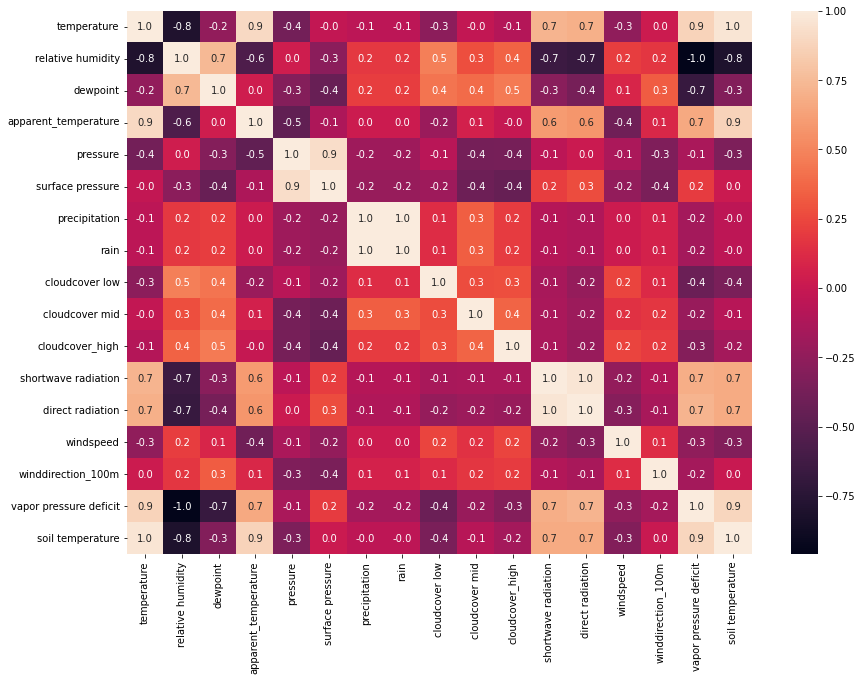

In [27]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f');


### checked correlation of the data as well to get more insights from the data and to find the positive and negative correlation beween the dependent and independent variables.

###Barplot visualisation to check the relationship between independents and dependent variables.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


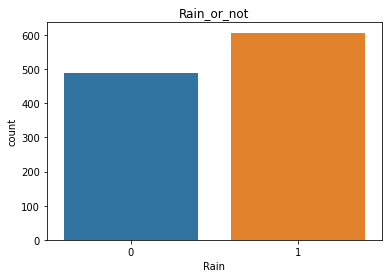

In [28]:
sns.countplot(new_df['Rain']).set_title('Rain_or_not');

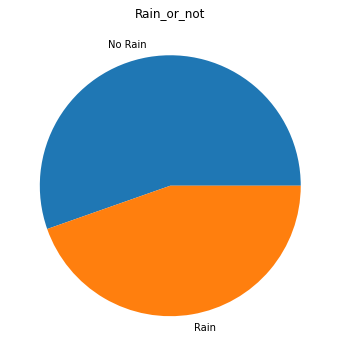

In [29]:
new_df1 = ['No Rain','Rain']
new_df_count = new_df['Rain'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(new_df_count,labels = new_df1)
plt.title('Rain_or_not')
plt.show()

###Distplot visualisation to check the the distribution of the data that whether its normally distributed or the data is skewed.

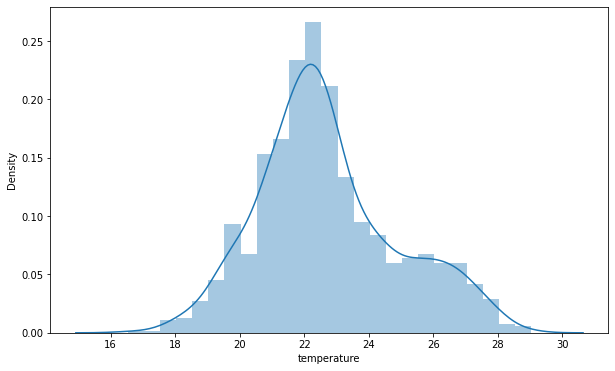

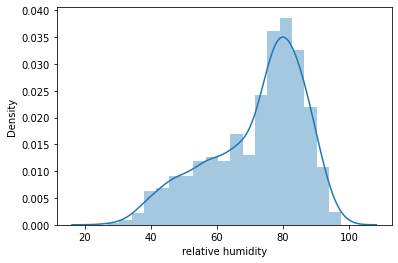

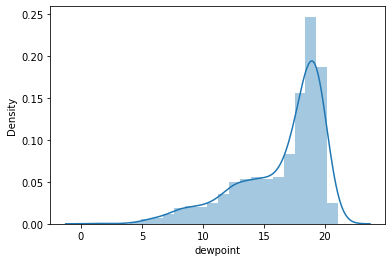

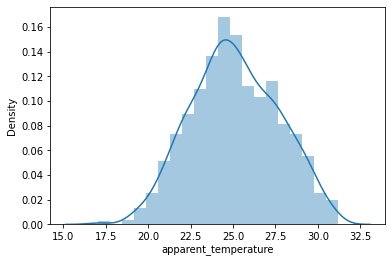

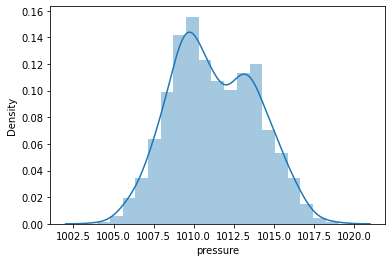

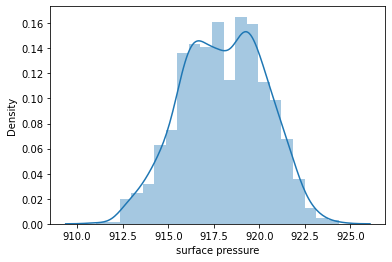

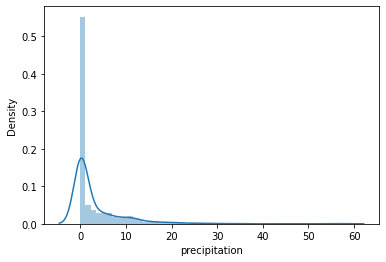

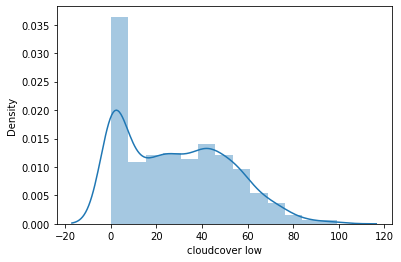

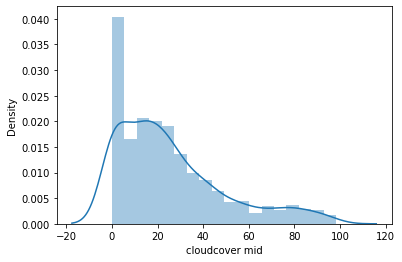

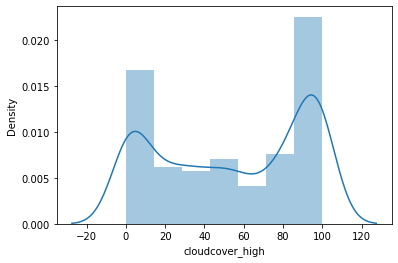

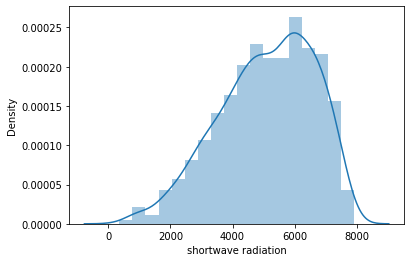

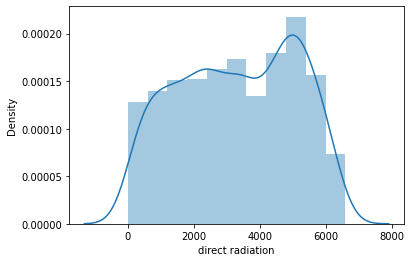

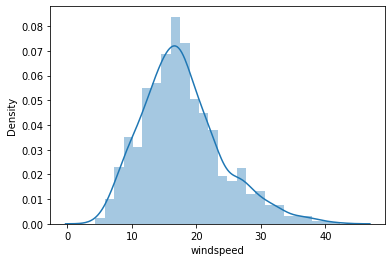

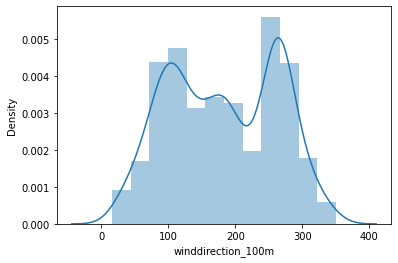

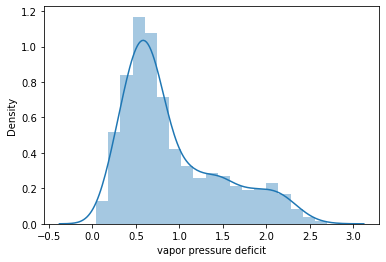

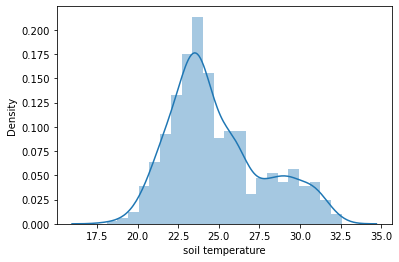

In [30]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10,6))
n = 1
for i in x_data:
  n = n+1
  sns.distplot(new_df[i],kde=True)
  plt.show()

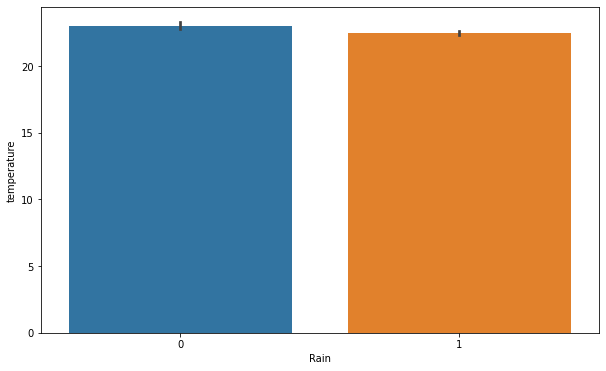

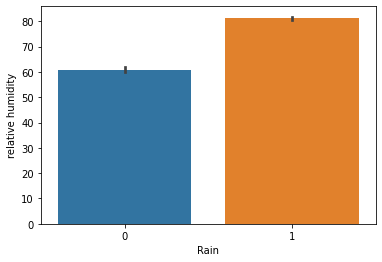

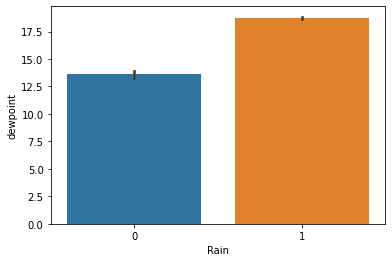

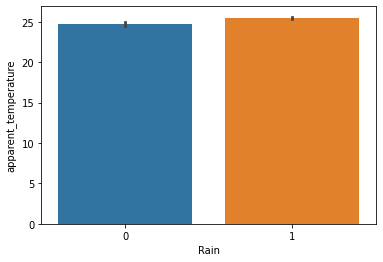

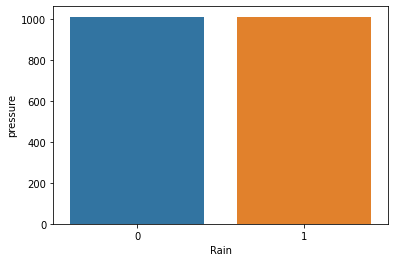

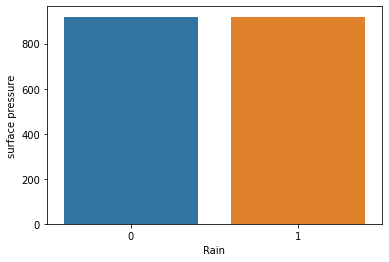

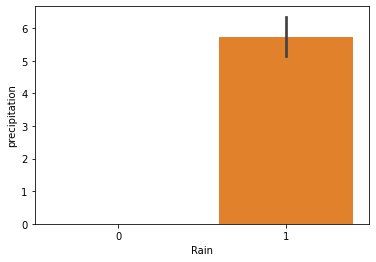

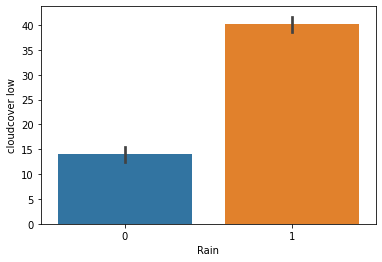

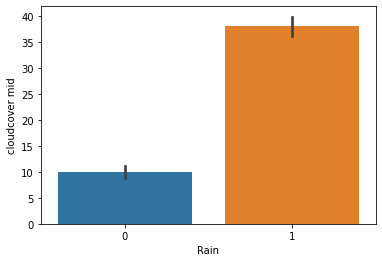

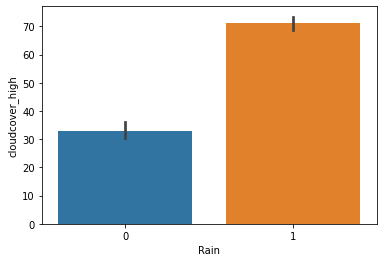

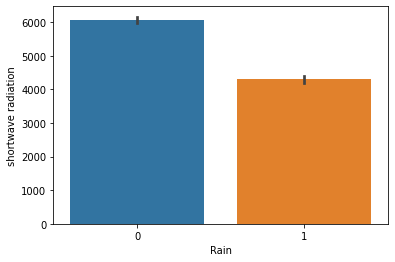

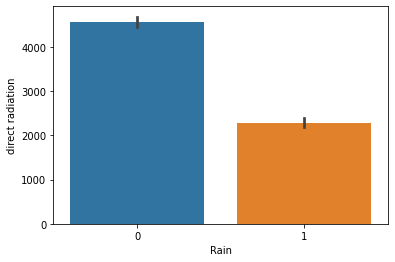

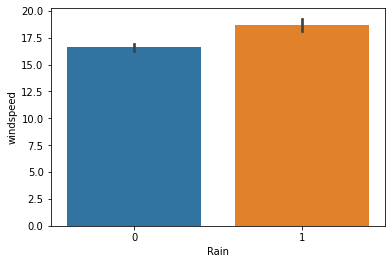

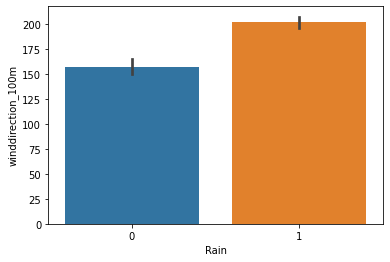

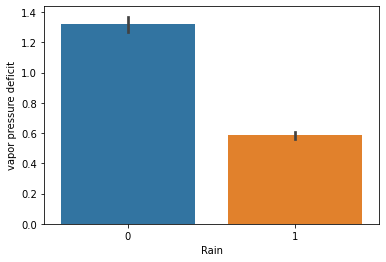

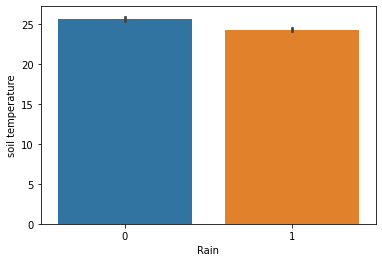

In [31]:
fig = plt.figure(figsize=(10,6))
n = 1
for i in x_data:
  n = n+1
  sns.barplot(data = new_df, y = i, x = 'Rain')
  plt.show()

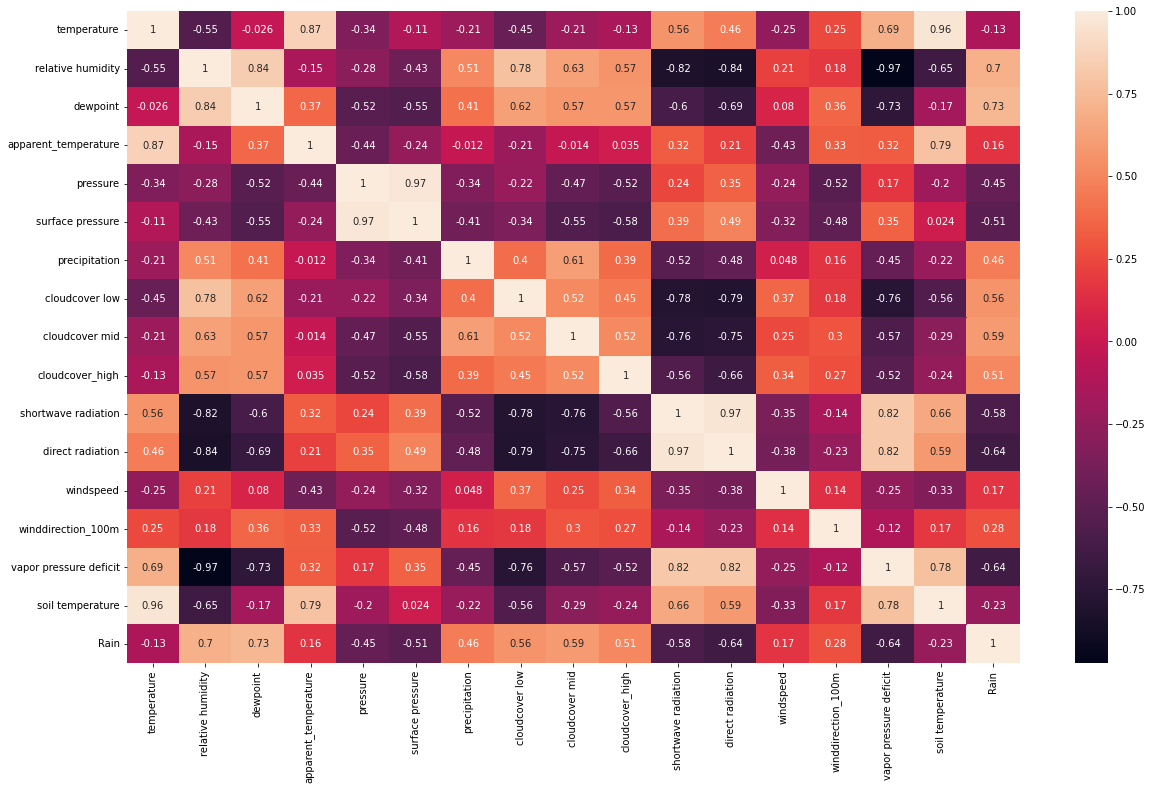

In [32]:
plt.figure(figsize = (20,12))
sns.heatmap(new_df.corr() , annot = True );

###Train_test_split to divide the data into training and testing set to build the ML model for training and testing purpose

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df.drop('Rain', axis=1),
                                                    new_df['Rain'],
                                                    test_size=0.2,
                                                    random_state=0)

In [34]:
x_train.shape, x_test.shape

((876, 16), (220, 16))

In [35]:
y_train.shape, y_test.shape

((876,), (220,))

### **Logistic Regression Machine Learning Algorithm to check the accuracy of the model,Precision, Recall & F1 Score of the model**

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred2 = logreg.predict(x_test)
print(confusion_matrix(y_test,y_pred2))

[[ 77  14]
 [  7 122]]


In [38]:
print(accuracy_score(y_test,y_pred2))


0.9045454545454545


In [39]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        91
           1       0.90      0.95      0.92       129

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



### Conclusion



F1 score, precision and recall values. so we have to choose ML models we have to use on different situatuion and use cases.

for example in the instanes , where we have to check accracy of our positive prediction then we have to give more importance to high precision and at that time logistic regression and XGboost are good choice

meanwhile in a situation where we have to check whether we are able to identify day of rainfall or not meanwhile how much true positive we are able to identify, in those instances we have to give more wqiegtahe to recall and decison tree will be most appropriate choice there